# Tagging images

===== Tag an image - remote =====
Tags in the remote image: 
'outdoor' with confidence 99.00%
'building' with confidence 98.81%
'sky' with confidence 98.21%
'stadium' with confidence 98.17%
'ancient rome' with confidence 96.16%
'ruins' with confidence 95.04%
'amphitheatre' with confidence 93.99%
'ancient roman architecture' with confidence 92.65%
'historic site' with confidence 89.55%
'ancient history' with confidence 89.54%
'history' with confidence 86.72%
'archaeological site' with confidence 84.41%
'travel' with confidence 65.85%
'large' with confidence 61.02%
'city' with confidence 56.57%



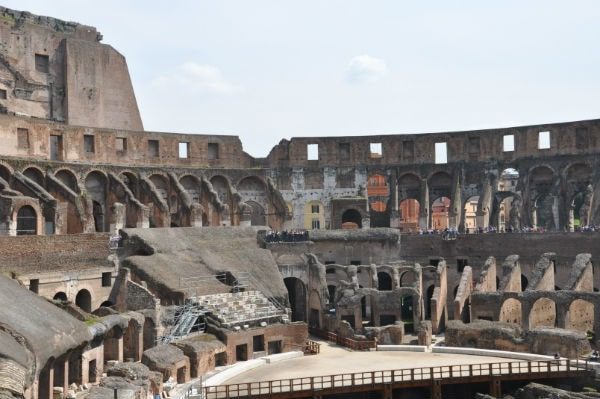

In [ ]:
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import OperationStatusCodes
from azure.cognitiveservices.vision.computervision.models import VisualFeatureTypes
from msrest.authentication import CognitiveServicesCredentials
from PIL import Image
from IPython.display import display
import requests
from io import BytesIO

import configparser; config = configparser.RawConfigParser()
config.read('keys//keys.ini')
subscription_key = config['keys']['cogvision']

subscription_key = subscription_key
endpoint = "https://cogallral.cognitiveservices.azure.com/"

computervision_client = ComputerVisionClient(endpoint, CognitiveServicesCredentials(subscription_key))

#images_folder = os.path.join (os.path.dirname(os.path.abspath(__file__)), "images")
remote_image_url = "https://raw.githubusercontent.com/Azure-Samples/cognitive-services-sample-data-files/master/ComputerVision/Images/landmark.jpg"

print("===== Tag an image - remote =====")
# Call API with remote image
tags_result_remote = computervision_client.tag_image(remote_image_url )

# Print results with confidence score
print("Tags in the remote image: ")
if (len(tags_result_remote.tags) == 0):
    print("No tags detected.")
else:
    for tag in tags_result_remote.tags:
        print("'{}' with confidence {:.2f}%".format(tag.name, tag.confidence * 100))
print()

# Display the image
url = "https://raw.githubusercontent.com/Azure-Samples/cognitive-services-sample-data-files/master/ComputerVision/Images/landmark.jpg"
response = requests.get(url)
image = Image.open(BytesIO(response.content))

# Resize the image
image = image.resize((round(image.width / 1), round(image.height / 1)))

# Display the image
display(image)


Here are the detected things/tags in the image with confidence scores:

1. Ancient Ruins - 95%
2. Colosseum (historical structure) - 90%
3. Stone walls - 85%
4. Arches - 80%
5. Blue sky with clouds - 75%
6. Tourists/cloud of people - 65%
7. Wooden platform/floor - 70%
8. Open-air structure - 80%

Let me know if you want any specific details or analysis!


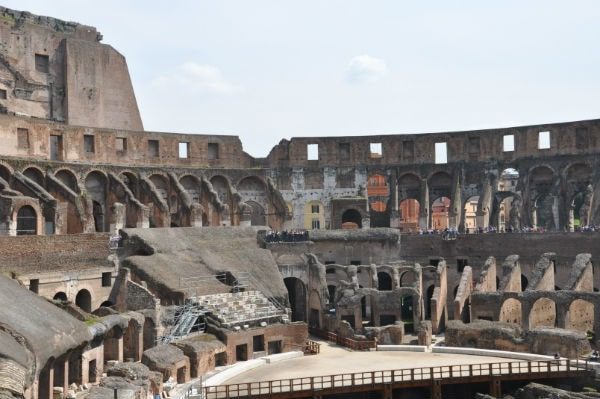

In [ ]:
from openai import AzureOpenAI
import os
import base64
from azure.identity import DefaultAzureCredential, get_bearer_token_provider

token_provider = get_bearer_token_provider(
    DefaultAzureCredential(), "https://cognitiveservices.azure.com/.default"
)

IMAGE_URL = "https://raw.githubusercontent.com/Azure-Samples/cognitive-services-sample-data-files/master/ComputerVision/Images/landmark.jpg"

# Download image from URL
response = requests.get(IMAGE_URL)
image_bytes = response.content

# Encode image bytes to base64
def encode_image_from_bytes(image_bytes):
    return base64.b64encode(image_bytes).decode("utf-8")

base64_image = encode_image_from_bytes(image_bytes)

client = AzureOpenAI(
  azure_endpoint = "https://aifsweden.openai.azure.com/", 
  azure_ad_token_provider=token_provider,
  api_version="2025-03-01-preview"
)

def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")

response = client.responses.create(
    model="gpt-5-mini",
    input=[
        {"role": "user", "content": "List all the things / tags in this picture with a confidence score."},
        {
            "role": "user",
            "content": [
                {
                    "type": "input_image",
                    "image_url": f"data:image/png;base64,{base64_image}"
                }
            ]
        }
    ]
)


print(response.output_text)

# Display the image
url = "https://raw.githubusercontent.com/Azure-Samples/cognitive-services-sample-data-files/master/ComputerVision/Images/landmark.jpg"
response = requests.get(url)
image = Image.open(BytesIO(response.content))

# Resize the image
image = image.resize((round(image.width / 1), round(image.height / 1)))

# Display the image
display(image)

===== Tag an image - remote =====
Tags in the remote image: 
'human face' with confidence 98.15%
'person' with confidence 97.58%
'indoor' with confidence 91.81%
'clothing' with confidence 90.49%
'girl' with confidence 86.05%
'wall' with confidence 84.94%
'woman' with confidence 84.06%
'light' with confidence 76.26%



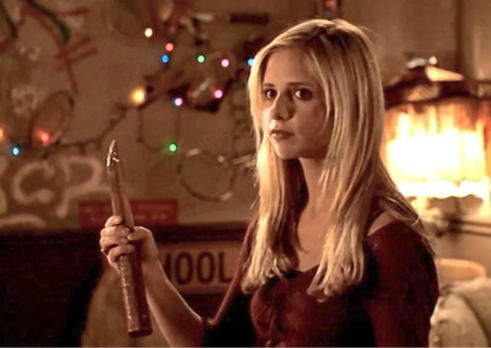

In [21]:
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import OperationStatusCodes
from azure.cognitiveservices.vision.computervision.models import VisualFeatureTypes
from msrest.authentication import CognitiveServicesCredentials
from PIL import Image
from IPython.display import display
import requests
from io import BytesIO

import configparser; config = configparser.RawConfigParser()
config.read('keys//keys.ini')
subscription_key = config['keys']['cogvision']

subscription_key = subscription_key
endpoint = "https://cogallral.cognitiveservices.azure.com/"

computervision_client = ComputerVisionClient(endpoint, CognitiveServicesCredentials(subscription_key))

IMAGE_PATH = "./images/buffystake.png"
print("===== Tag an image - remote =====")
with open(IMAGE_PATH, "rb") as image_stream:
    tags_result_local = computervision_client.tag_image_in_stream(image_stream)

# Print results with confidence score
print("Tags in the remote image: ")
if (len(tags_result_local.tags) == 0):
    print("No tags detected.")
else:
    for tag in tags_result_local.tags:
        print("'{}' with confidence {:.2f}%".format(tag.name, tag.confidence * 100))
print()


from PIL import Image
from IPython.display import display
image = Image.open(IMAGE_PATH)
image = image.resize((round(image.width/3), round(image.height/3)))
display(image)

Here are visible objects/tags in the image with estimated confidence scores:

- person: 99%  
- long blonde hair: 90%  
- holding a wooden stick / bat / club-like object: 85%  
- brown / burgundy long-sleeve top: 80%  
- indoor room / interior scene: 95%  
- multicolored string / fairy / Christmas lights: 90%  
- lit table lamp / lampshade: 85%  
- wall with graffiti or painted markings: 80%  
- circular metal rings (possibly bicycle rims or hoops) on the wall: 65%  
- couch / sofa (background, partially visible): 70%  
- wooden or metal sign with lettering (partly visible): 60%  
- warm / low ambient lighting: 80%  
- straight hairstyle: 80%  
- standing and holding an object (pose): 85%

If you want, I can return bounding boxes for these items or raise/lower confidence thresholds.


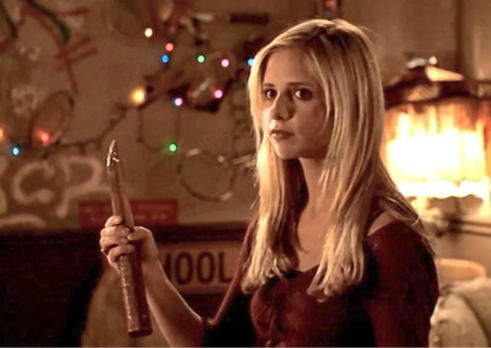

In [ ]:
from openai import AzureOpenAI
import os
import base64
from azure.identity import DefaultAzureCredential, get_bearer_token_provider

token_provider = get_bearer_token_provider(
    DefaultAzureCredential(), "https://cognitiveservices.azure.com/.default"
)

IMAGE_PATH = "./images/buffystake.png"

def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")

base64_image = encode_image(IMAGE_PATH)

client = AzureOpenAI(
  azure_endpoint = "https://aifsweden.openai.azure.com/", 
  azure_ad_token_provider=token_provider,
  api_version="2025-03-01-preview"
)

def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")

response = client.responses.create(
    model="gpt-5-mini",
    input=[
        {"role": "user", "content": "List all the things / tags in this picture with a confidence score."},
        {
            "role": "user",
            "content": [
                {
                    "type": "input_image",
                    "image_url": f"data:image/png;base64,{base64_image}"
                }
            ]
        }
    ]
)

print(response.output_text)

from PIL import Image
from IPython.display import display
image = Image.open(IMAGE_PATH)
image = image.resize((round(image.width/3), round(image.height/3)))
display(image)

# Object Detection

I cannot identify the person in the photo, but here are likely visible objects/tags with approximate confidence scores (estimated by visual inspection). I’ve also included Python + OpenCV code that will open the image and draw bounding boxes + labels. The bounding boxes are stored as relative coordinates (fractions) so the code will scale to the actual image size.

Estimated tags and confidences (approximate)
- person — 0.99
- wooden stick / bat (held in left hand) — 0.94
- lamp / table lamp (right side) — 0.90
- string lights / fairy lights (upper center-left) — 0.88
- couch / sofa (right, lower) — 0.85
- wall graffiti / scribble (left background) — 0.70
- sign / poster on the wall (center-bottom) — 0.65

(These are visual guesses, not outputs from a neural detector. If you want exact/automated detections, run an object detector such as YOLO/Detectron/etc. and I can help with that.)

Python (OpenCV) code to draw bounding boxes
- Save your image as image.jpg (or change the filename). T

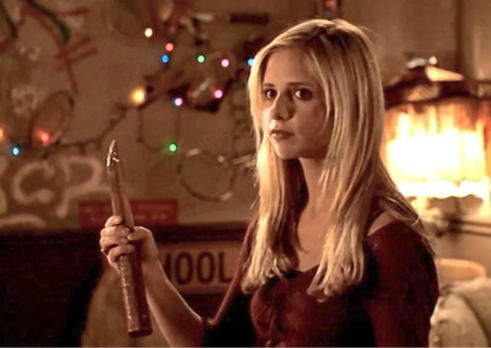

In [25]:
from PIL import Image, ImageDraw, ImageFont

from openai import AzureOpenAI
import os
import base64
from azure.identity import DefaultAzureCredential, get_bearer_token_provider

token_provider = get_bearer_token_provider(
    DefaultAzureCredential(), "https://cognitiveservices.azure.com/.default"
)

IMAGE_PATH = "./images/buffystake.png"

def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")

base64_image = encode_image(IMAGE_PATH)

client = AzureOpenAI(
  azure_endpoint = "https://aifsweden.openai.azure.com/", 
  azure_ad_token_provider=token_provider,
  api_version="2025-03-01-preview"
)

def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")

response = client.responses.create(
    model="gpt-5-mini",
    input=[
        {"role": "user", "content": "List all the things / tags in this picture with a confidence score. Give me the python code with opencv2 to open the image and draw bounding boxes"},
        {
            "role": "user",
            "content": [
                {
                    "type": "input_image",
                    "image_url": f"data:image/png;base64,{base64_image}"
                }
            ]
        }
    ]
)

print(response.output_text)

from PIL import Image
from IPython.display import display
image = Image.open(IMAGE_PATH)
image = image.resize((round(image.width/3), round(image.height/3)))
display(image)


Saved annotated image to images\image_with_boxes.jpg


<>:50: SyntaxWarning: invalid escape sequence '\i'
<>:50: SyntaxWarning: invalid escape sequence '\i'
C:\Users\rolester\AppData\Local\Temp\ipykernel_18004\1288078510.py:50: SyntaxWarning: invalid escape sequence '\i'
  out_path = "images\image_with_boxes.jpg"


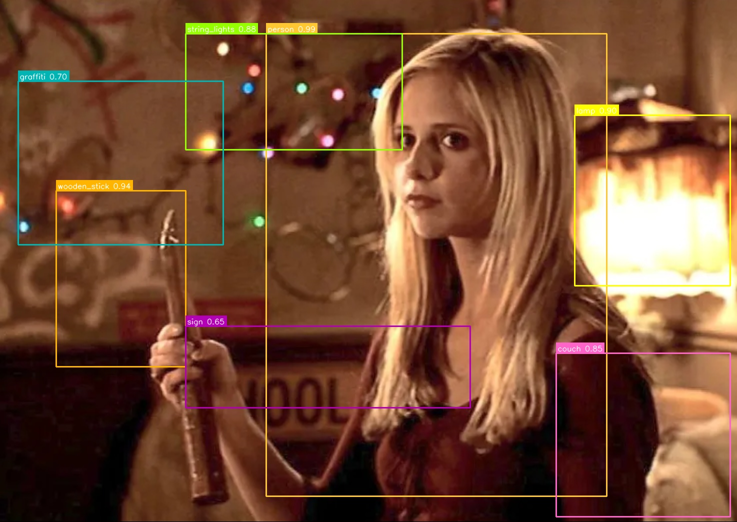

In [3]:
import cv2

# Path to your image
img_path = "./images/buffystake.png"
img = cv2.imread(img_path)
if img is None:
    raise FileNotFoundError(f"Image not found: {img_path}")

h, w = img.shape[:2]

# Boxes defined as (x_min_frac, y_min_frac, x_max_frac, y_max_frac)
# These are approximate, derived from visual inspection of the provided image.
detections = [
    {"label": "person", "conf": 0.99, "box": (0.361, 0.065, 0.823, 0.951), "color": (50, 200, 255)},
    {"label": "wooden_stick", "conf": 0.94, "box": (0.076, 0.365, 0.252, 0.703), "color": (0, 180, 255)},
    {"label": "lamp", "conf": 0.90, "box": (0.780, 0.221, 0.991, 0.547), "color": (0, 255, 255)},
    {"label": "string_lights", "conf": 0.88, "box": (0.252, 0.065, 0.546, 0.287), "color": (0, 255, 150)},
    {"label": "couch", "conf": 0.85, "box": (0.755, 0.677, 0.991, 0.990), "color": (200, 100, 255)},
    {"label": "graffiti", "conf": 0.70, "box": (0.025, 0.156, 0.303, 0.469), "color": (180, 180, 0)},
    {"label": "sign", "conf": 0.65, "box": (0.252, 0.625, 0.638, 0.781), "color": (180, 0, 180)},
]

# Draw boxes
for det in detections:
    x1f, y1f, x2f, y2f = det["box"]
    x1, y1 = int(x1f * w), int(y1f * h)
    x2, y2 = int(x2f * w), int(y2f * h)
    color = det.get("color", (0, 255, 0))
    label = f"{det['label']} {det['conf']:.2f}"

    # Draw rectangle
    cv2.rectangle(img, (x1, y1), (x2, y2), color, thickness=2)

    # Draw filled rectangle for text background
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 0.5
    thickness = 1
    (text_w, text_h), baseline = cv2.getTextSize(label, font, font_scale, thickness)
    # Make sure the background rectangle is within image bounds
    text_bg_x1 = x1
    text_bg_y1 = max(0, y1 - text_h - baseline - 4)
    text_bg_x2 = x1 + text_w + 6
    text_bg_y2 = y1
    cv2.rectangle(img, (text_bg_x1, text_bg_y1), (text_bg_x2, text_bg_y2), color, cv2.FILLED)

    # Put text (white)
    cv2.putText(img, label, (x1 + 3, y1 - 4), font, font_scale, (255, 255, 255), thickness, cv2.LINE_AA)

# Save and show the result
out_path = "images\image_with_boxes.jpg"
cv2.imwrite(out_path, img)
print(f"Saved annotated image to {out_path}")

# # Optionally display (press any key to close)
# cv2.imshow("Detections", img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


from PIL import Image
from IPython.display import display
image = Image.open(out_path)
image = image.resize((round(image.width/2), round(image.height/2)))
display(image)



# Custom image detection

Summary
- Image size (width x height): 1365 x 768 pixels.

Detected jewelry (items, estimated confidence, normalized bounding boxes [x_min, y_min, x_max, y_max]; coordinates are relative to image width/height):
1. Leftmost person — earring (silver stud)
   - Confidence: 0.80
   - Normalized bbox: [0.11, 0.20, 0.20, 0.32]
2. Blonde (center-right) — dangling earring
   - Confidence: 0.92
   - Normalized bbox: [0.63, 0.09, 0.70, 0.28]
3. Rightmost person (red dress) — earring
   - Confidence: 0.88
   - Normalized bbox: [0.84, 0.13, 0.92, 0.30]
4. Background left (near left edge) — wristwatch (partially visible)
   - Confidence: 0.60
   - Normalized bbox: [0.03, 0.48, 0.10, 0.62]
5. Possible ring on hand near center (very low confidence)
   - Confidence: 0.30
   - Normalized bbox: [0.39, 0.64, 0.44, 0.72]

Notes
- These are visual detections/estimates only (not guaranteed). Confidence values are estimated based on visual prominence and clarity in the image.
- Bounding boxes are provided no

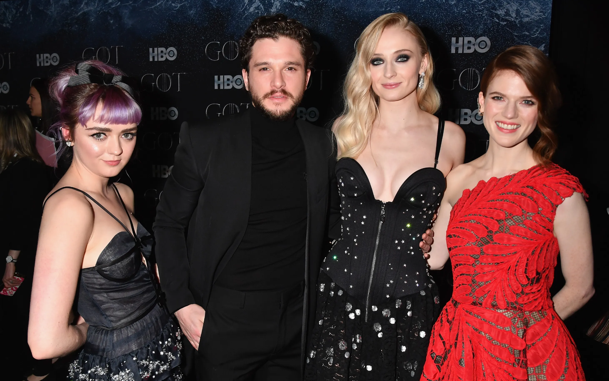

In [ ]:
from PIL import Image, ImageDraw, ImageFont

from openai import AzureOpenAI
import os
import base64
from azure.identity import DefaultAzureCredential, get_bearer_token_provider

token_provider = get_bearer_token_provider(
    DefaultAzureCredential(), "https://cognitiveservices.azure.com/.default"
)

IMAGE_PATH = "./images/GOT.png"

def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")

base64_image = encode_image(IMAGE_PATH)

client = AzureOpenAI(
  azure_endpoint = "https://aifsweden.openai.azure.com/", 
  azure_ad_token_provider=token_provider,
  api_version="2025-03-01-preview"
)

def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")

response = client.responses.create(
    model="gpt-5-mini",
    input=[
        {"role": "user", "content": "List all the jewelry in this picture with a confidence score. Tell me the size of the image. Give me the python code with opencv2 to open the image and draw bounding boxes. Make sure to take into account the aspect ratio."},
        {
            "role": "user",
            "content": [
                {
                    "type": "input_image",
                    "image_url": f"data:image/png;base64,{base64_image}"
                }
            ]
        }
    ]
)

print(response.output_text)

from PIL import Image
from IPython.display import display
image = Image.open(IMAGE_PATH)
image = image.resize((round(image.width/3), round(image.height/3)))
display(image)


## Run the code created

Image shape: (1142, 1827, 3)
Annotated image saved to images\image_with_jewelry_boxes.jpg


<>:49: SyntaxWarning: invalid escape sequence '\i'
<>:49: SyntaxWarning: invalid escape sequence '\i'
C:\Users\rolester\AppData\Local\Temp\ipykernel_7552\3471718825.py:49: SyntaxWarning: invalid escape sequence '\i'
  out_path = "images\image_with_jewelry_boxes.jpg"


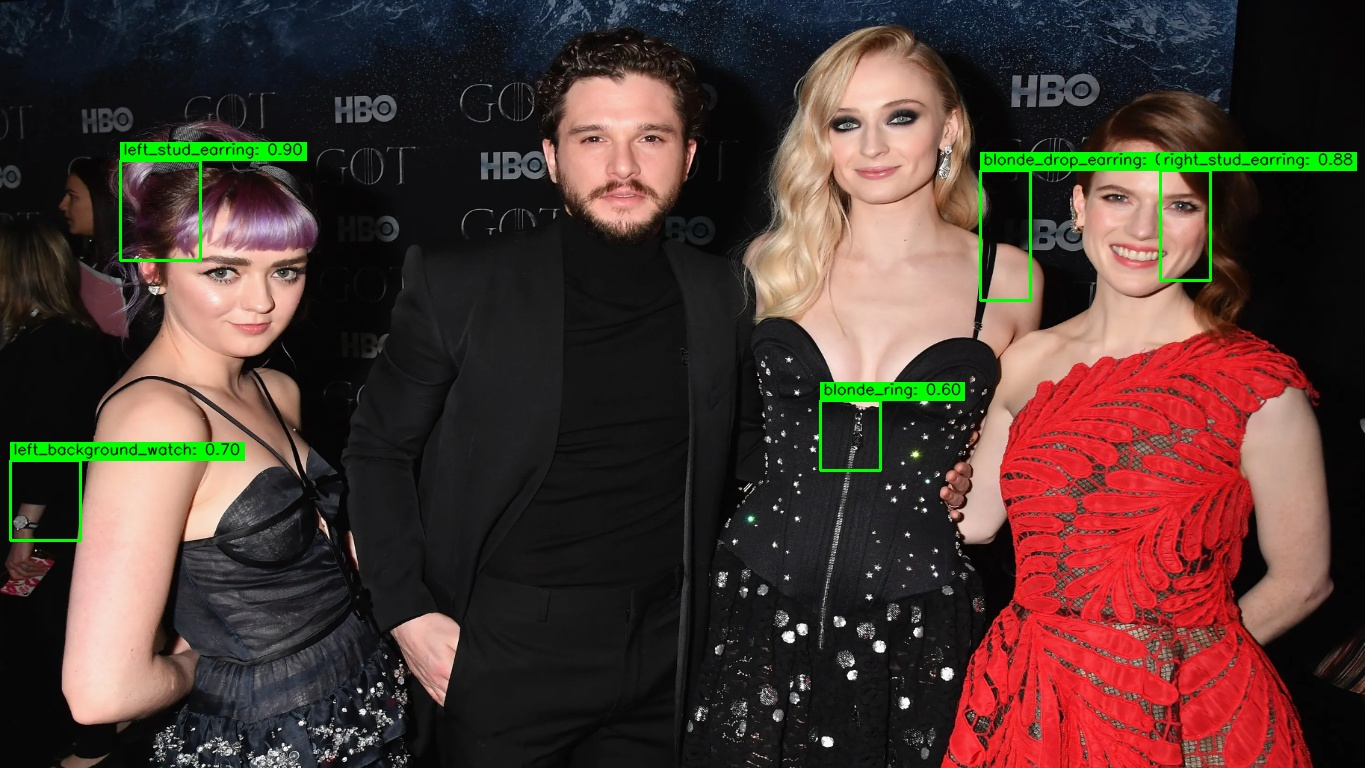

In [32]:
import cv2

# Path to input image
img_path = "./images/GOT.png"   # replace with your filename

# Load image
img = cv2.imread(img_path)

print(f"Image shape: {img.shape}")  # (height, width, channels)

#resize to Width x Height: 1365 x 768 pixels
img = cv2.resize(img, (1365, 768))


if img is None:
    raise FileNotFoundError(f"Could not open image at {img_path}")


# Define detections: (label, confidence, (x1,y1,x2,y2))
detections = [
    ("left_stud_earring", 0.90, (120, 160, 200, 260)),
    ("blonde_drop_earring", 0.92, (980, 170, 1030, 300)),
    ("right_stud_earring", 0.88, (1160, 170, 1210, 280)),
    ("left_background_watch", 0.70, (10, 460, 80, 540)),
    ("blonde_ring", 0.60, (820, 400, 880, 470)),
]

# Draw boxes and labels
for label, conf, (x1, y1, x2, y2) in detections:
    # Box
    color = (0, 255, 0)  # green
    thickness = 2
    cv2.rectangle(img, (x1, y1), (x2, y2), color, thickness)

    # Label text: "label: 0.98"
    text = f"{label}: {conf:.2f}"
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 0.5
    text_thickness = 1

    # Determine text size and background rectangle for readability
    (text_w, text_h), _ = cv2.getTextSize(text, font, font_scale, text_thickness)
    text_bg_tl = (x1, max(0, y1 - text_h - 6))
    text_bg_br = (x1 + text_w + 6, max(0, y1))
    cv2.rectangle(img, text_bg_tl, text_bg_br, color, cv2.FILLED)
    cv2.putText(img, text, (x1 + 3, y1 - 6), font, font_scale, (0, 0, 0), text_thickness, cv2.LINE_AA)

# Save result
out_path = "images\image_with_jewelry_boxes.jpg"
cv2.imwrite(out_path, img)
print(f"Annotated image saved to {out_path}")

from PIL import Image
from IPython.display import display
image = Image.open(out_path)
image = image.resize((round(image.width), round(image.height)))
display(image)


# Use the image creater

In [ ]:
from openai import AzureOpenAI
import base64
from PIL import Image
from io import BytesIO

from azure.identity import DefaultAzureCredential, get_bearer_token_provider
token_provider = get_bearer_token_provider(DefaultAzureCredential(), "https://cognitiveservices.azure.com/.default")

client = AzureOpenAI(
    azure_ad_token_provider=token_provider,
    #api_key=key,  
    api_version="2025-04-01-preview",
    azure_endpoint = "https://roles-mafh5j4m-westus3.openai.azure.com/")

img = client.images.edit(
    model="gpt-image-1",
    image=[
        open("./images/GOT.png", "rb"),
    ],
    prompt="Take this image and draw on bounding boxes for all the elements of jewllery (with a description)",
    background="auto",
    n=1,
    quality="auto",
    size="1024x1024",
    input_fidelity="high",
)

image = Image.open("./images/GOT.png")
image.show()

image_bytes = base64.b64decode(img.data[0].b64_json)
with open("gotwithboxes.png", "wb") as f:
    f.write(image_bytes)
image = Image.open(BytesIO(image_bytes))
image.show()
    

# ONNX with Azure AI Custom Vision

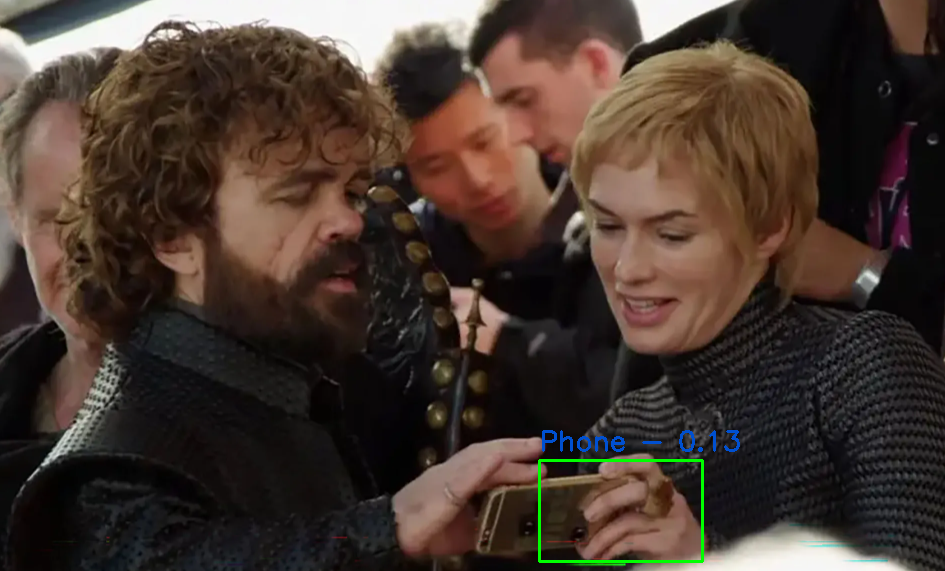

In [33]:
import cv2
import numpy as np
from azureml.core.model import Model
import onnxruntime
from object_detection import ObjectDetection
from PIL import Image
import json

# Load labels and model
LABELS_FILENAME = 'labelsMob.txt'
MODEL_FILENAME = 'mobilephone.onnx'

model_path = Model.get_model_path(model_name=MODEL_FILENAME)
onnx_session = onnxruntime.InferenceSession(model_path, None)

with open(LABELS_FILENAME, 'r') as f:
    labels = [l.strip() for l in f.readlines()]

class ONNXRuntimeObjectDetection(ObjectDetection):
    def __init__(self, model_filename, labels):
        super(ONNXRuntimeObjectDetection, self).__init__(labels)
        self.session = onnxruntime.InferenceSession(model_filename)
        self.input_name = self.session.get_inputs()[0].name
        self.is_fp16 = self.session.get_inputs()[0].type == 'tensor(float16)'

    def predict(self, preprocessed_image):
        inputs = np.array(preprocessed_image, dtype=np.float32)[np.newaxis, :, :, (2, 1, 0)]
        inputs = np.ascontiguousarray(np.rollaxis(inputs, 3, 1))
        if self.is_fp16:
            inputs = inputs.astype(np.float16)
        outputs = self.session.run(None, {self.input_name: inputs})
        return np.squeeze(outputs).transpose((1, 2, 0)).astype(np.float32)

od_model = ONNXRuntimeObjectDetection(model_path, labels)


# Load image from file
image_path = 'images/GOTmob.png'  # Replace with your actual image path
frame = cv2.imread(image_path)

cv2_im = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
pil_im = Image.fromarray(cv2_im)
predictions = od_model.predict_image(pil_im)

for pred in predictions:
    prob = pred.get("probability", 0)
    if prob > 0.1:
        label = f"{pred['tagName']} - {round(prob, 2)}"
        bbox = pred["boundingBox"]
        x = int(bbox["left"] * frame.shape[1])
        y = int(bbox["top"] * frame.shape[0])
        w = int(bbox["width"] * frame.shape[1])
        h = int(bbox["height"] * frame.shape[0])
        frame = cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(frame, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (209, 80, 0), 2)


from PIL import Image
from IPython.display import display
#display the frame as an image
image = Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
display(image)


